# The Generation and Use of Random Numbers
## Exercise 1
We want to generate random numbers, which may sound easy, but is actually pretty difficult. Our method is to input a specific x into a recursive function where after each iteration we use the previous x. This may seem like we wouldn't get a very good array of random numbers because well we used a formula to find them. Well, apparently the modulous function helps us here, where we are modulating by a huge number. The code is as follows

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy.random import rand 
from numpy.random import randn 
%matplotlib inline

In [3]:
def rng(x, npts):
    a = 427419669081
    m = 999999999989
    u = np.empty(npts)
    u[0] = x/m
    for i in range(1, npts):
        x = (a*x) % m
        u[i] = x/m
    return u

In [4]:
def randu(x, npts):
    a = 2**16 + 3
    m = 2**31
    u = np.empty(npts)
    u[0] = x/m
    for i in range(1, npts):
        x = (a*x) % m
        u[i] = x/m
    return u

These two methods are functionally the same, but have different modulous and multiplier. So know we need to test their legitimacy, which we do in two ways.

**Histogram**

The method has us plot the data in a histogram and we see if there is any noticable deviation. We expect that if this method is good then we will have equal distribution.

**Pair correlation**

For this we just plot each successive pair

$$(u_1, u_2),(u_2, u_3),(u_3, u_4),\ldots$$

where $u$ is 'random' number.

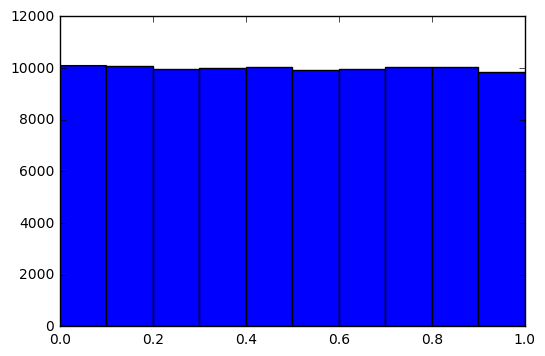

In [5]:
a = rng(100,100000)
plt.hist(a,bins = 10);

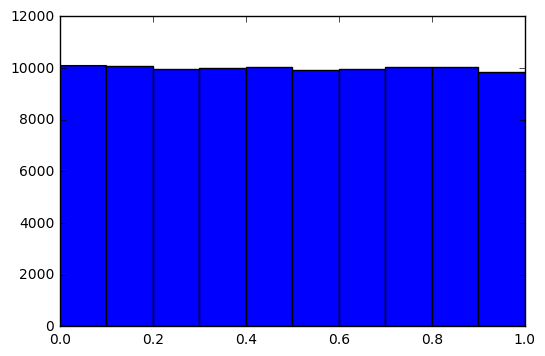

In [6]:
b = rng(100,100000)
plt.hist(a,bins = 10);

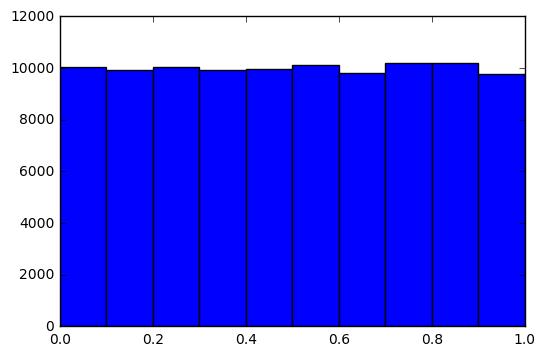

In [7]:
c = rand((100000))
plt.hist(c,bins = 10);

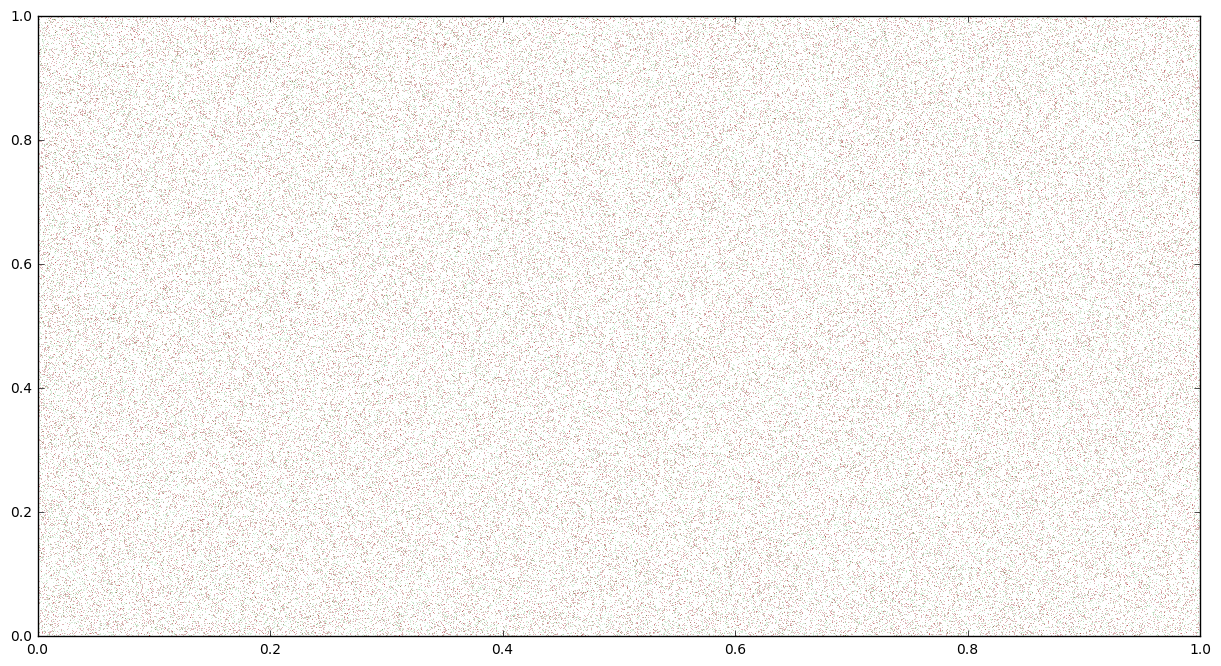

In [8]:
plt.figure(figsize = (15,8))
x1 = a[: -1 ]
y1 = a[1:]
x3 = c[: -1 ]
y3 = c[1:]
x2 = b[: -1 ]
y2 = b[1:]
plt.plot(x1,y1, 'k.', ms = .1)

plt.plot(x2,y2, 'r.', ms = .1)

plt.plot(x3,y3, 'g.', ms = .1);

Numpy has a package 'random' that has its own random number generator, We tested it here using the same method. The results show that there is a uniform distrobution in the method and that each pair of successive random numbers aren't related. 

## Exercise 2
Next, we want to use random numbers to find $\pi$, which requires us to generate a lot of random numbers. With the random numebrs, we want to generate them between -1 and 1, which we do by multiplying all the values by two and then subtracting 1 from it. The function generates points $[0,1)$, when multiplied $[0,2)$ and then we subtract $[-1,1)$. To find the area we just use the following ratio

\begin{align*}
\frac{\text{# of points in circle}}{\text{# of points}} &= \frac{\text{area of circle}}{\text{area of the rectangle}} = \frac{\pi r^2}{4r^2}\\
\pi &= \frac{4*\text{# of points in circle}}{\text{# of points}} 
\end{align*}

The value of pi is 3.140416


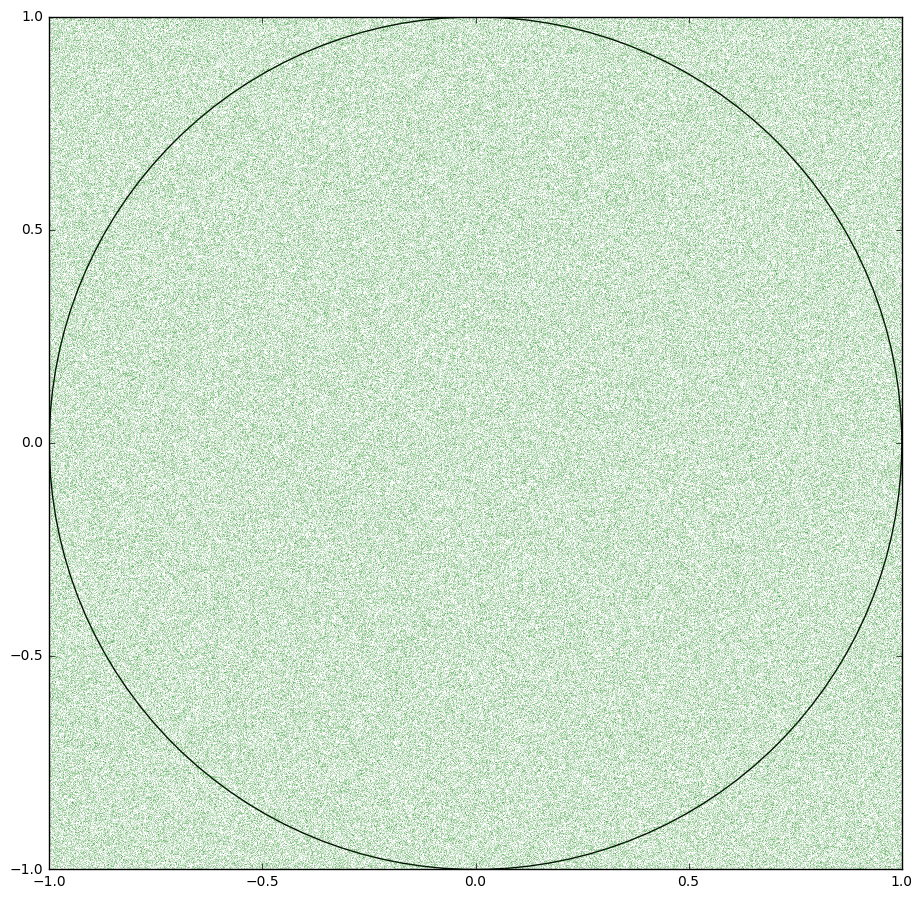

In [9]:
npts = 1000000
x,y = rand(2,npts)*2 - 1
r = np.hypot(x,y)
points = np.sum(r < 1)
print("The value of pi is",4*points/npts)
radius = 1
plt.figure(figsize = (11,11))
plt.plot(x,y,'g.', ms = .1)
circle = plt.Circle((0,0), radius, fill = False)
plt.gca().add_artist(circle)
plt.xlim(-1,1)
plt.ylim(-1,1);

As you can see, this approximation is decent because we were able to get a value for $\pi$ that's pretty close.  

## Exercise 3
Now we want to find out how many games Serena can win, when the chance of her winning a point is 60%. This is fairly simple, 4 points wins the game, so we need to generate 7 random numbers where anything below .6 is a point for venus. Then we average all the outcomes to see how likely it is for her to win a game. My guess is that she will probably win 60% of all the games

Chance of winning a game 69.7 percent


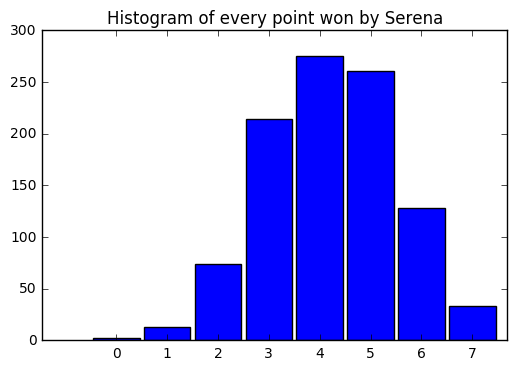

In [10]:
ngames = 1000
points = rand(7, ngames) < 0.6
scores = np.sum(points, axis=0)
wins = scores >= 4
print("Chance of winning a game",100*np.mean(wins),"percent")
his = np.histogram(scores,8)
fig, ax = plt.subplots()
offset = .4
plt.bar(his[1][1:],his[0])
plt.title("Histogram of every point won by Serena")
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels( ('0', '1', '2', '3','4', '5', '6','7') );

As we can see from the histogram, Serena wins a lot, 70.7% to be percise. This is more than I assumed in the beginning, which makes sense given the amount of games simulated.

## Exercise 4
We want to see if the sum of random numbers converge to any specific value. To do this we generate a 2-D array and add every value in each column. 

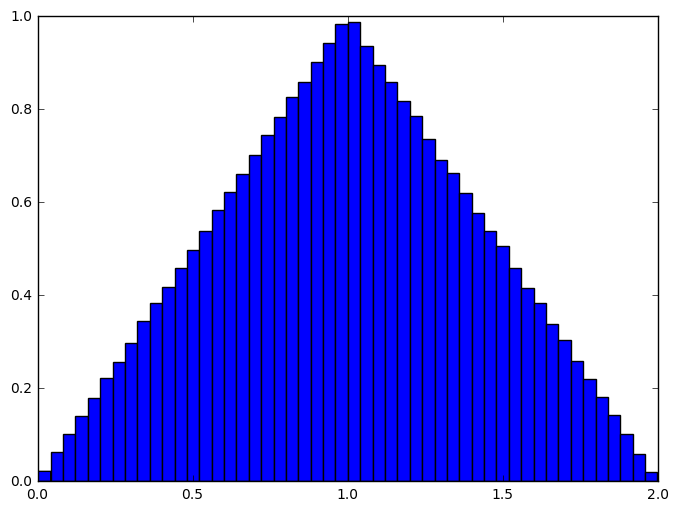

In [11]:
plt.figure(figsize = (8,6))
npts = 1000000
sums = np.sum(rand(2,npts),axis = 0)
plt.hist(sums, bins = 50, normed = True);

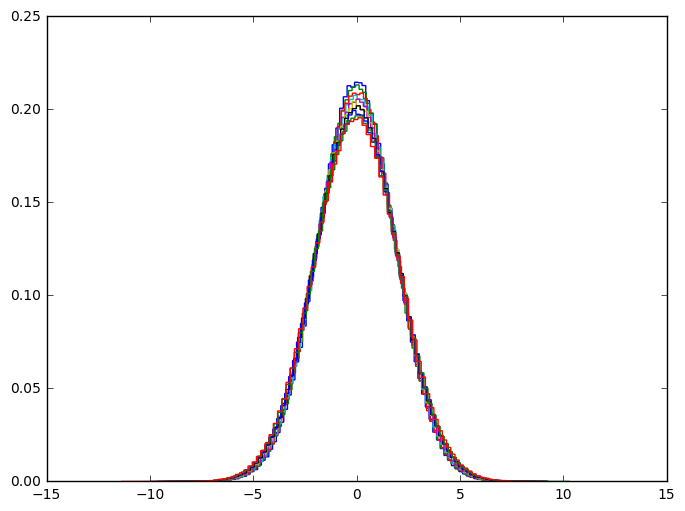

In [12]:
plt.figure(figsize = (8,6))
npts = 1000000
for i in range(40,50):
    sums = np.sum(rand(i+1,npts),axis = 0) - ((i + 1)/2)
    plt.hist(sums, bins = 100, normed = True, histtype = 'step');

When we add more rows we see that it does converge to a specific value, which seems to be zero. I tried to have more rows but my computer kept crashing, but I got as low as .2. Also I shifted every iteration by the average so that it was centered over zero. 

## Exercise 5
Constructing the function is pretty straight forward

\begin{align*}
p(t) &= \lambda e^{-\lambda t}\\
u &= \int_0^{g(u)} \lambda e^{-\lambda t} dt\\
t = g(u) &= \frac{-\ln(1-u)}{\lambda}
\end{align*}

from here we can construct the histogram.

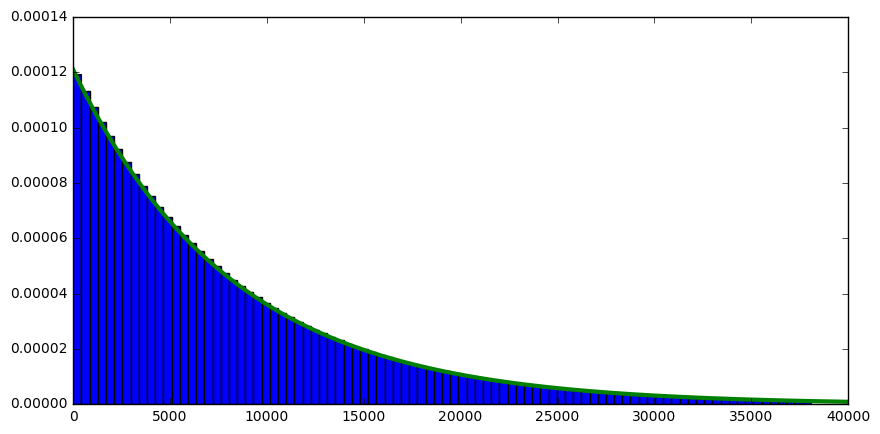

In [5]:
plt.figure(figsize=(10,5))
lam = 1/8267
tmax = 40000
t = np.linspace(0,tmax, tmax )
u = np.linspace(0,.99,tmax )
g = -np.log(1 - u)/lam
p = lam*np.exp(-lam*t)
plt.hist(g,bins = 90, normed = True)
plt.plot(t, p, lw = 3);
#plt.xlim(0, tmax);

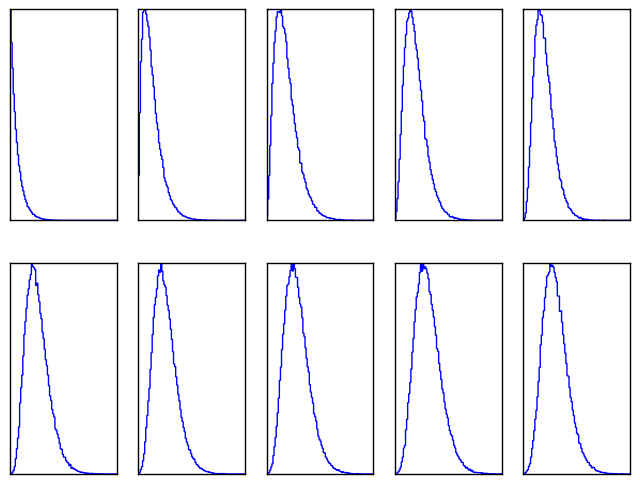

In [13]:
plt.figure(figsize = (8,6))
npts = 100000
for i in range(1,11):
    plt.subplot(2,5,i)
    u = rand(i,npts)
    g = -np.log(1 - u)/lam
    sums = np.sum(g,axis = 0)
    plt.xticks([])
    plt.yticks([])
    plt.hist(sums, bins = 100, normed = True, histtype = 'step');

As we can observe, the distrubution seems to take shape as we add more random values to the sum. It starts out looking some sort of exponential, then morphs finally to a Gaussian moving towards the center of the domain. 

## Exercise 6
Now we have a situation where we have a choice of three cups, with 1 of them being the right choice. After an initial guess, it is revealed that one of the cups not chosen was the wrong choice. Does it make more sense to stay on the initial guess or change? Initial I would stay because I assume that its still a 1 and 3 chance, I was wrong.

In [30]:
ngames = 100000
winning = randint(1,4,size = ngames)
chosen = np.ones(ngames, dtype = int)
print("Chance of winning", np.mean(chosen == winning), 'percent')

Chance of winning 0.33266 percent


Now we can see the rate of winning if we were to have switched after the cup reveal.

In [31]:
switched = np.where(winning == chosen, randint(2,4,size = ngames), winning)
print("Chance of winning", np.mean(switched == winning), 'percent')

Chance of winning 0.66734 percent


After 100000 games it is appearnt that we should switch after the first cup reveal. Switching makes you 2/3 likely to win compared to the initail guess which is 1/3. 

## Exercise 7
The stock market model is given by

\begin{align*}
s(t + 1) = (1 + \mu + \sigma \epsilon)s(t)
\end{align*}

In [15]:
def stock(time):
    stock = np.empty(time + 1)
    stock[0] = 1
    for i in range(1,time + 1):
        sto = randn(1) 
        stock[i] = (1 + .05*sto)*stock[i - 1]
    return stock

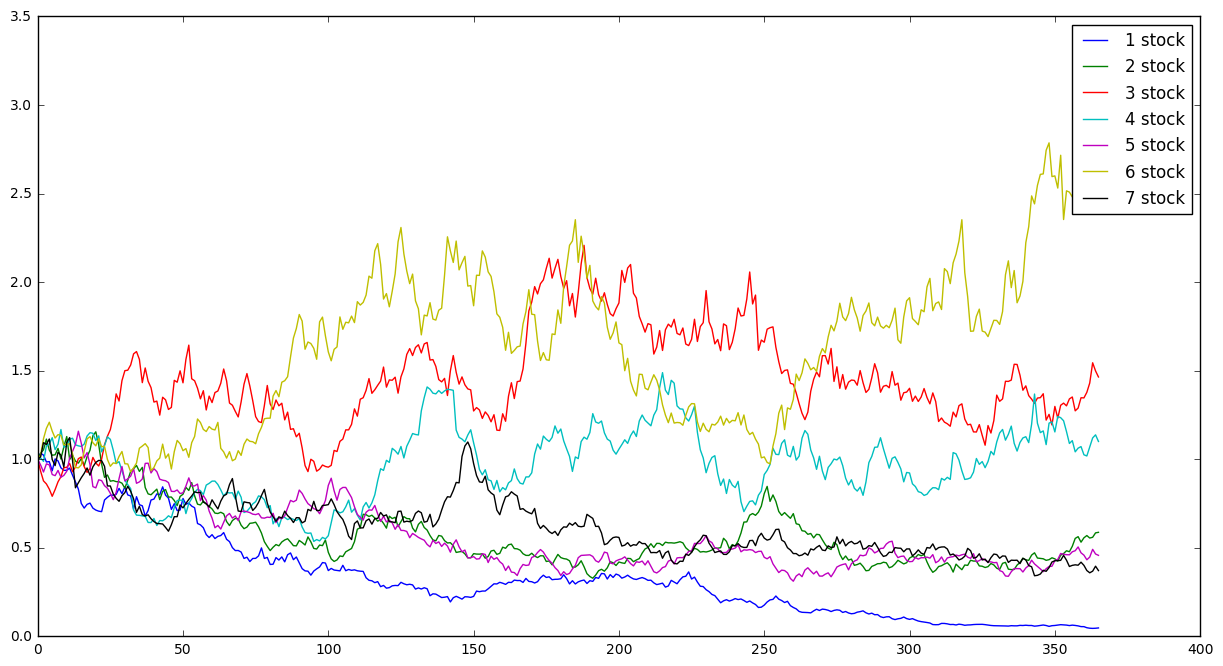

In [37]:
plt.figure(figsize = (15,8))
time = 365
x = np.linspace(0,365,366)
for i in range(0,7):
    y = stock(time)
    plt.plot(x,y, label = "{} stock".format(i + 1))
plt.legend();

The most likely price is 8.80462159086
The chance of losing money is 68.2 percent
The mean is 0.939940094754


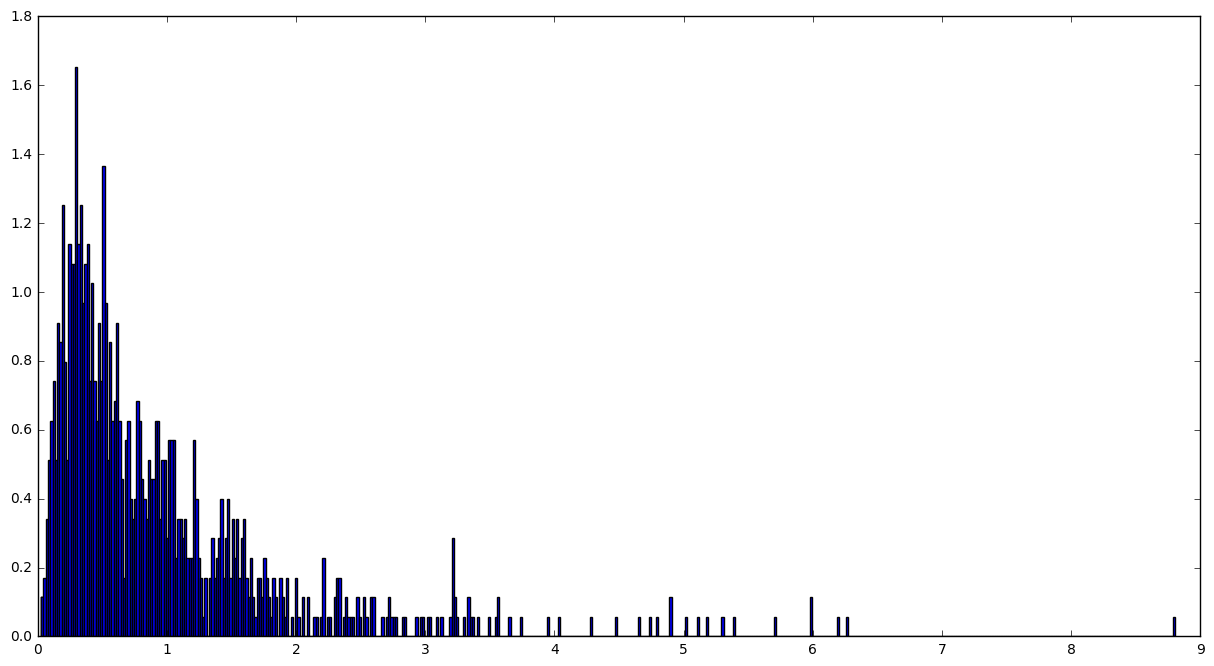

In [43]:
plt.figure(figsize = (15,8))
time = 365
x = np.linspace(0,365,366)
length = 1000
storage = np.empty(length)
for i in range(0,length):
    y = stock(time)
    storage[i] = y[-1]
losing = np.sum(storage < 1)/length
print("The most likely price is", storage[np.argmax(storage)])
print("The chance of losing money is", losing * 100, "percent")
print("The mean is", np.mean(storage))
n, bins, patches = plt.hist(storage, bins = 500, normed = True)

After some observation, $.25 is the most likely value of any stock after 1 year. We can run this for a smaller sigma value.

In [46]:
def stock2(time):
    stock = np.empty(time + 1)
    stock[0] = 1
    for i in range(1,time + 1):
        sto = randn(1) 
        stock[i] = (1 + .01*sto)*stock[i - 1]
    return stock

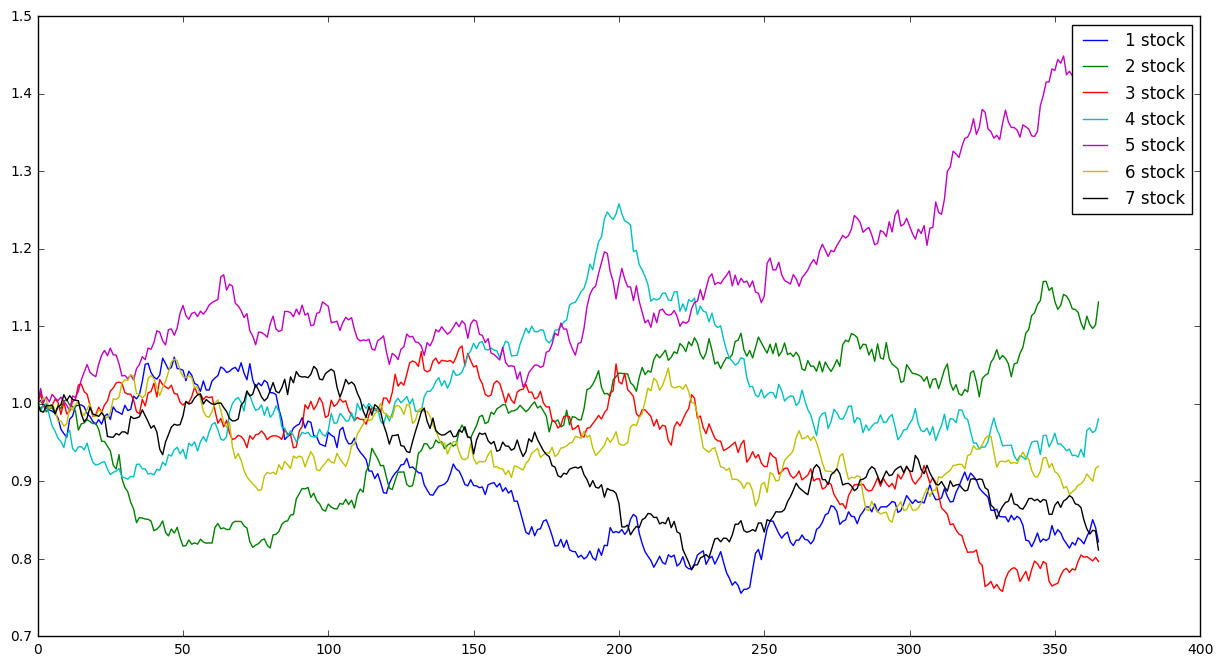

In [49]:
plt.figure(figsize = (15,8))
time = 365
x = np.linspace(0,365,366)
for i in range(0,7):
    y = stock2(time)
    plt.plot(x,y, label = "{} stock".format(i + 1))
plt.legend();

The most likely price is 11.2009275922
The chance of losing money is 69.3 percent
The mean is 0.990605962237


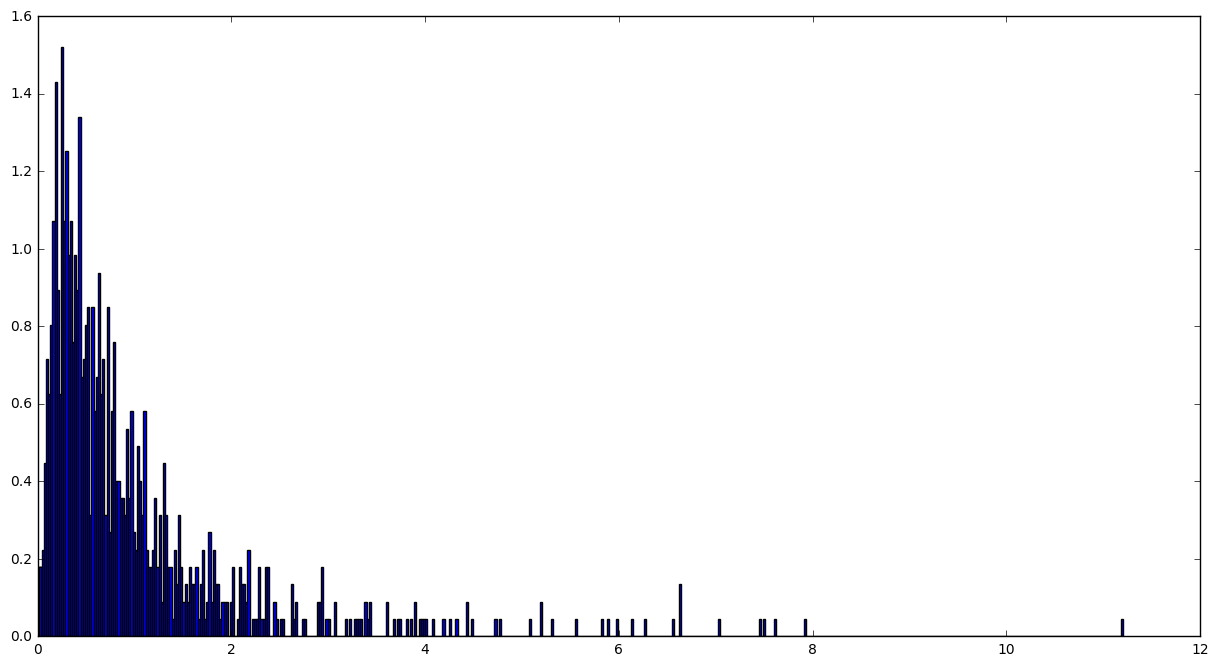

In [50]:
plt.figure(figsize = (15,8))
time = 365
x = np.linspace(0,365,366)
length = 1000
storage = np.empty(length)
for i in range(0,length):
    y = stock(time)
    storage[i] = y[-1]
losing = np.sum(storage < 1)/length
print("The most likely price is", storage[np.argmax(storage)])
print("The chance of losing money is", losing * 100, "percent")
print("The mean is", np.mean(storage))
n, bins, patches = plt.hist(storage, bins = 500, normed = True)

The final prices seem to be more concentrated around the $0$ to $.25$ price point. Not too different from the former histogram, but definitely less. A weird thing that I noticed was that was always a higher price in the latter histogram compared to the former. I'm not entirely sure why and its probably a coincidence.   